<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/02Classificazione/01RegressioneLogistica/regressioneLogistica01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressione logistica
## Esercizio 1
**Author: Cristiano Casadei**

In [1]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv -O diabetes.csv

--2022-12-19 13:37:12--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.03s   

2022-12-19 13:37:13 (812 KB/s) - ‘diabetes.csv’ saved [23873/23873]



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# carico il dataset (contiene già gli header, quindi non li devo specificare)
pima = pd.read_csv("./diabetes.csv")

# diamo un'occhiata al contenuto
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# diamo un'occhiata alle classi di Outcome (la nostra proprietà di uscita)
pima["Outcome"].unique()

array([1, 0])

Text(0.5, 427.9555555555555, 'Classi predette')

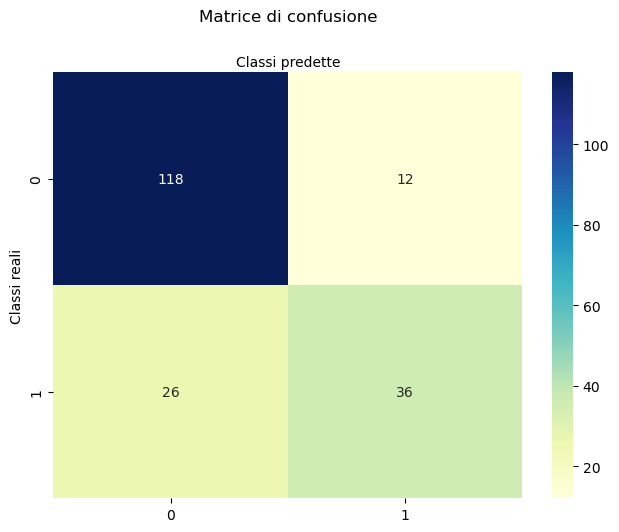

In [5]:
# preparo la matrice di input ed il vettore di output
X = pima.drop("Outcome", axis=1).values
Y = pima["Outcome"].values

# suddivido il dataset in dataset di train e di test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# istanzio la classe di standardizzazione e standardizzo i dataset
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

# istanzio la classe di regressione logistica, la alleno e ottengo una predizione
logReg = LogisticRegression()
logReg.fit(X_train_std, Y_train)
Y_pred = logReg.predict(X_test_std)

# eseguo una predizione anche delle confidenze delle classificazioni
# mi servirà per il calcolo della negative log-likelihood
Y_pred_proba = logReg.predict_proba(X_test_std)

# creo una matrice di confusione per analizzare il comportamento della predizione
cnf_matrix = confusion_matrix(Y_test, Y_pred)

# visualizzo la matrice di confusione in modo grafico
class_names = [0, 1]
_, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice di confusione', y=1.1)
plt.ylabel('Classi reali')
plt.xlabel('Classi predette')

In [6]:
# valutiamo il modello con le metriche messe a disposizione da SciKitLearn
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("Neg. Log-Likelihood:", log_loss(Y_test, Y_pred_proba))

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226
Neg. Log-Likelihood: 0.44446823672435354
